In [4]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
green_buildings = pd.read_csv('greenbuildings.csv')
green_buildings.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [9]:
cluster_grouping = green_buildings.groupby(['cluster', 'age'])[['Rent']].mean()
# mean_group_speed = cars.groupby(['cyl', 'manufacturer'])[['speed']].mean()

cluster_grouping

Rent
cluster age        
1       5     40.69
        16    38.56
        20    43.16
        27    28.57
        36    33.31
...             ...
1230    95    44.50
        96    51.56
        97    44.00
        101   65.00
        107  111.11

[6177 rows x 1 columns]

KeyError: False

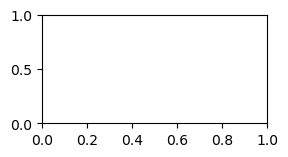

In [10]:
plt.subplot(3,2,1)
sns.boxplot(y='Rent', x = 'green_rating', data=cluster_grouping[['cluster']=='1'])
# plt.subplot(3,2,2)
# sns.boxplot(y='review', x = 'Rent', data=employee)
# plt.subplot(3,2,3)
# sns.boxplot(y='projects', x = 'Rent', data=employee)
# plt.subplot(3,2,4)
# sns.boxplot(y='tenure', x = 'Rent', data=employee)
# plt.subplot(3,2,5)
# sns.boxplot(y='satisfaction', x = 'Rent', data=employee)

<AxesSubplot:title={'center':'Rent for Green and Non Green Buildings'}, xlabel='green_rating', ylabel='Rent'>

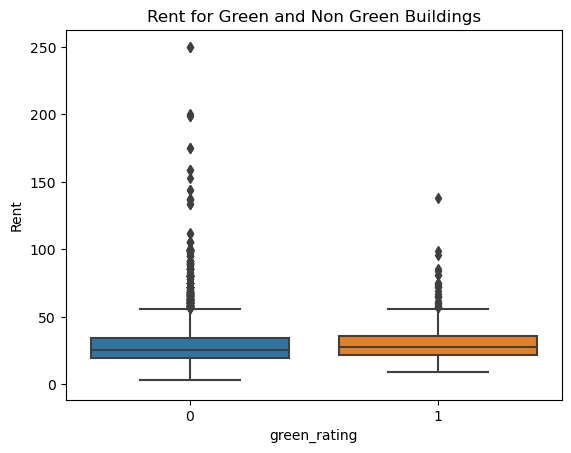

In [11]:
# check numerical variable vs. y
plt.plot(1,1,1)
plt.title('Rent for Green and Non Green Buildings')
sns.boxplot(y='Rent', x = 'green_rating', data=green_buildings)


<AxesSubplot:title={'center':'Rent for Class A and Non Class A Buildings'}, xlabel='class_a', ylabel='Rent'>

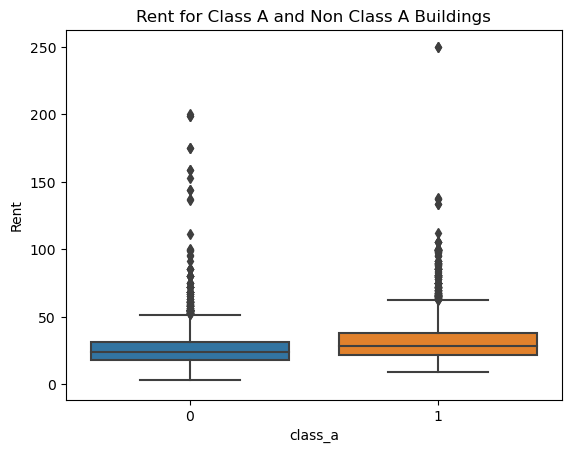

In [12]:
plt.plot(1,1,1)
plt.title('Rent for Class A and Non Class A Buildings')
sns.boxplot(y='Rent', x = 'class_a', data=green_buildings)

In [ ]:
# do above box plots but for each cluster

In [13]:
mask = green_buildings['green_rating'] == 1
mask.head(10)

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: green_rating, dtype: bool

In [14]:
green_rated = green_buildings[mask]
green_rated.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.0137,0.0290,36.780
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.0101,0.0289,17.500
16,431225,8,409889,67.78,30.50,97.06,20,6,0,1,...,1,0,0,5240,956,6196,10.46,0.0120,0.0235,25.500
29,204299,11,525422,1.74,25.00,71.10,16,23,0,1,...,1,0,1,1113,6001,7114,41.32,0.0108,0.0233,22.000
34,437486,13,378538,3.27,26.61,95.54,17,22,0,1,...,1,0,1,2269,2382,4651,40.70,0.0138,0.0229,25.055


# QUESTION 2 ANALYSIS 


The original argument assumes that the green building will be making profit for an additional 30 years (after recouping the initial costs). Assuming a time span of roughly 40 years after the initial construction, is the positive revenue stream from rent within this time period for green buildings a reasonable assumption? Could rent price for green buildings be related to other variables that could actually make the business lose money?

Let's make a correlation matrix between rent and other variables for all building types to conduct further analysis. 

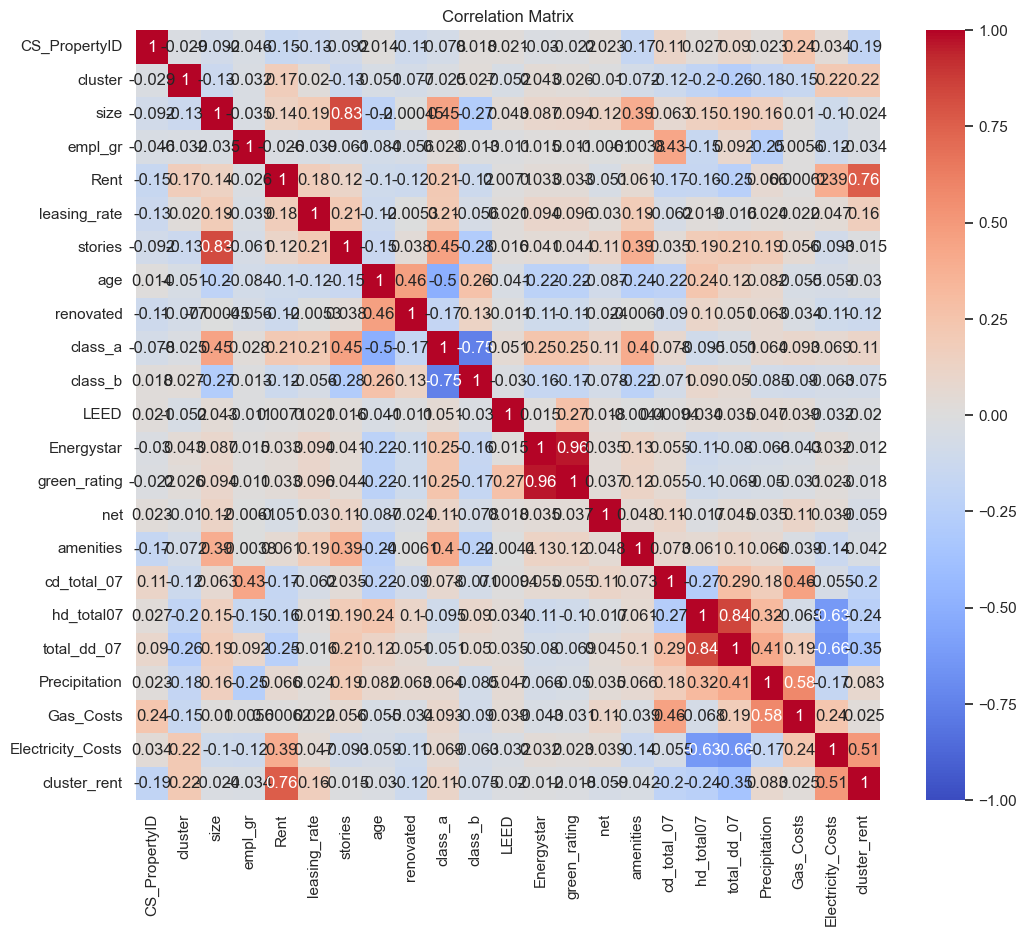

In [28]:
###create correlation matrix??
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("greenbuildings.csv")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract correlations with the "Rent" variable
rent_correlations = correlation_matrix["Rent"]

# Print the correlation values
# print(rent_correlations)

##lets visualize it
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("greenbuildings.csv")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Set the title of the heatmap
plt.title("Correlation Matrix")

# Show the heatmap
plt.show()


From the correlation matrix above, it seems that rent price for all buildings is most positively correlated with cluster_rent and electricity_costs. This assumption makes sense because rent of a building is usually determined by the cluster of buildings nearby and electricity prices could drastically impact how much a tenant has to pay for rent.

However, green buildings may react differently to changes in cluster_rent and eleftricity_costs in comaprison to non-green buildings. To prove this, let's split up green-buildings and non-green-buildings and see if cluster rent and electricity costs impacts green buildings differently from traditional buildings.

Text(0.5, 1.0, 'Cluster Rent vs Rent for Green and Non-Green Buildings')

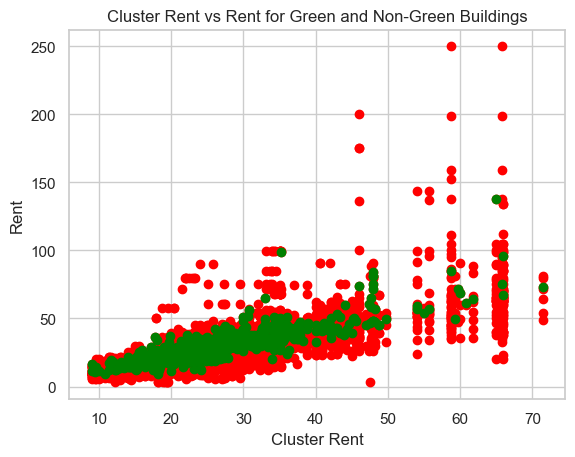

In [33]:
# Create a scatter plot
plt.scatter(green_buildings['cluster_rent'], green_buildings['Rent'], label='All buildings', color='red')
plt.scatter(green_rated['cluster_rent'], green_rated['Rent'], label='Green rated buildings', color='green')

# Add labels and title
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Cluster Rent vs Rent for Green and Non-Green Buildings')

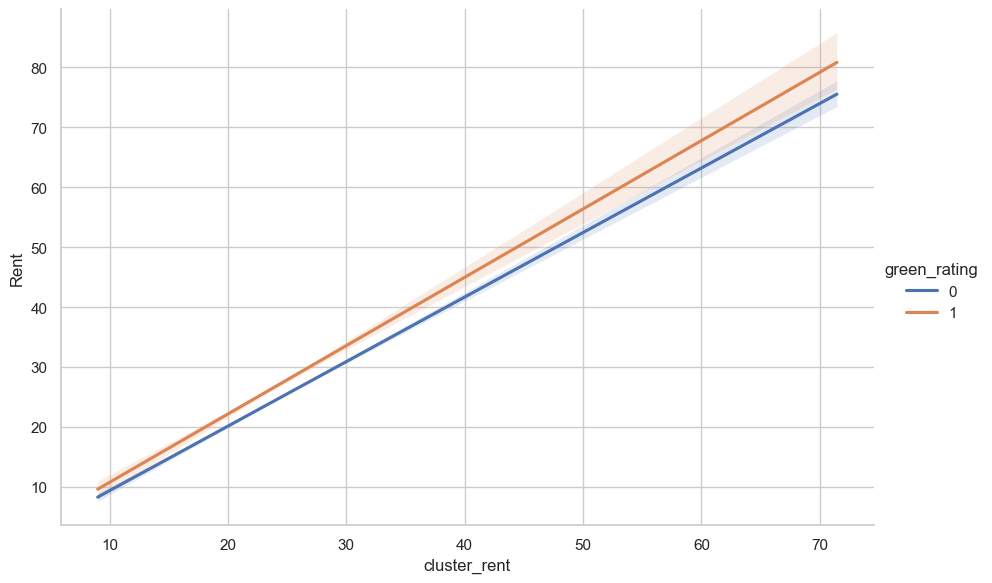

In [31]:
sns.set(style='whitegrid')
g=sns.lmplot(data=green_buildings,x='cluster_rent',y='Rent',hue='green_rating',scatter=False,height=6,aspect=1.5)

Text(0.5, 1.0, 'Electricity Costs vs Rent for Green and Non-Green Buildings')

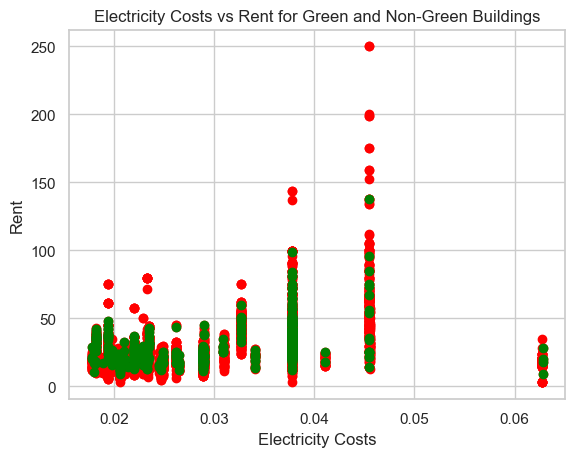

In [34]:
# Create a scatter plot
plt.scatter(green_buildings['Electricity_Costs'], green_buildings['Rent'], label='All buildings', color='red')
plt.scatter(green_rated['Electricity_Costs'], green_rated['Rent'], label='Green rated buildings', color='green')

# Add labels and title
plt.xlabel('Electricity Costs')
plt.ylabel('Rent')
plt.title('Electricity Costs vs Rent for Green and Non-Green Buildings')

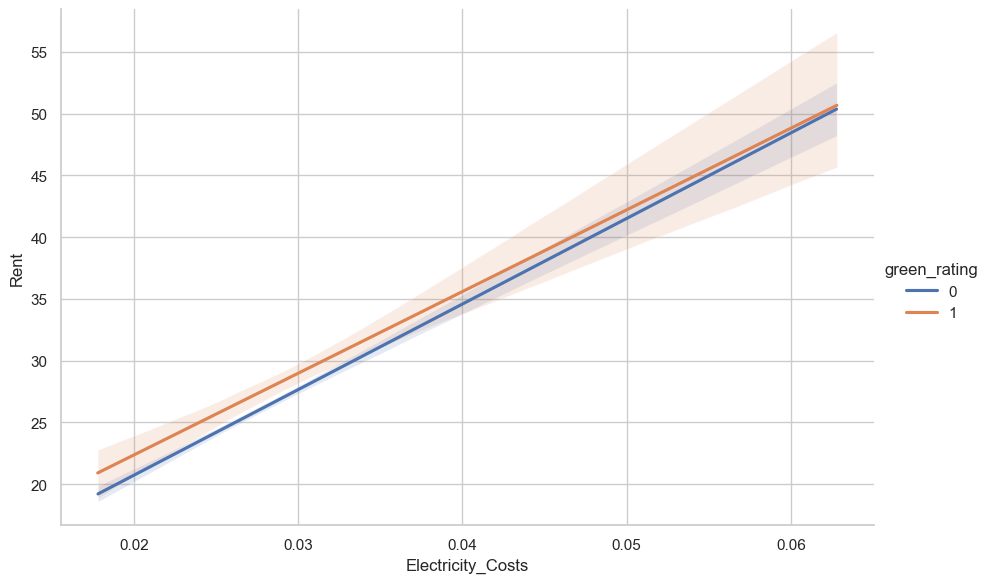

In [32]:
sns.set(style='whitegrid')
g=sns.lmplot(data=green_buildings,x='Electricity_Costs',y='Rent',hue='green_rating',scatter=False,height=6,aspect=1.5)

From the graphs above, green buildings' rent seem to act similarly to non green buildings' rent with changes in cluster rent and electricity costs. 

### Perhaps the age and size of green buildings may impact rent in different ways in comparison to non-green buildings?
###

NameError: name 'x' is not defined

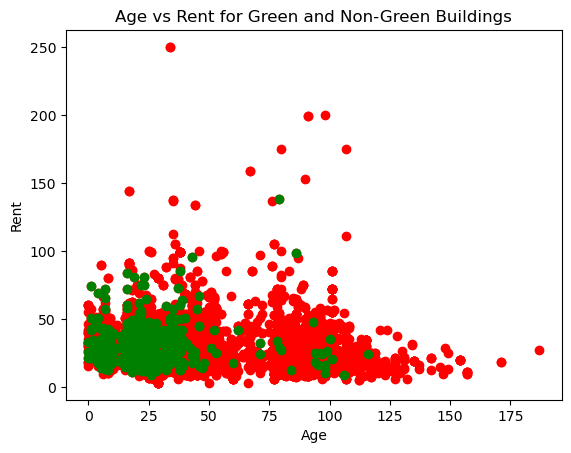

In [15]:
import numpy as np
from scipy import stats

###what variables are related to rent price? age?

# Create a scatter plot
plt.scatter(green_buildings['age'], green_buildings['Rent'], label='All buildings', color='red')
plt.scatter(green_rated['age'], green_rated['Rent'], label='Green rated buildings', color='green')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Age vs Rent for Green and Non-Green Buildings')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add legend
plt.legend()

# Show the plot
plt.show()

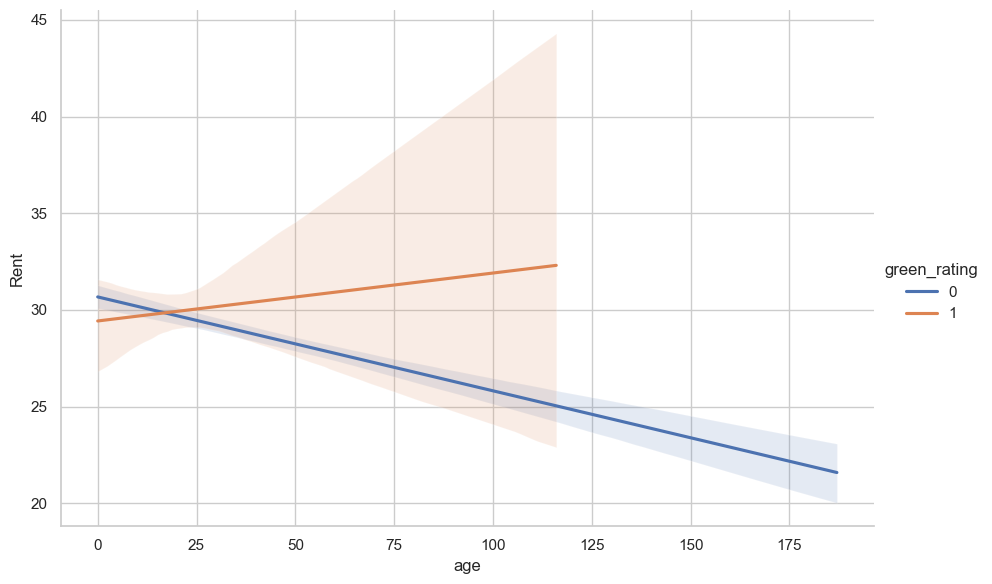

In [26]:
sns.set(style='whitegrid')
g=sns.lmplot(data=green_buildings,x='age',y='Rent',hue='green_rating',scatter=False,height=6,aspect=1.5)

From the graph above, it seems that non-green buildings are likely to decrease in rent as they age. However, the rent trajectory for green buildings is undetermined with an increase in age. This analysis makes sense because green buildings are newer, with less historical data points to work with to determine a statiscally significant correlation between age and rent. 

Text(0.5, 1.0, 'Size vs Rent for Green and Non-Green Buildings')

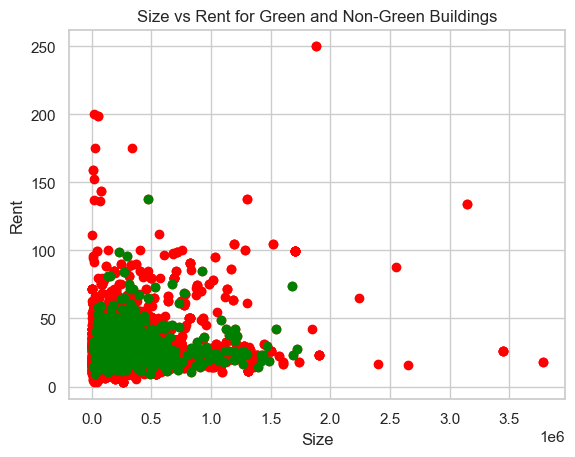

In [25]:
plt.scatter(green_buildings['size'], green_buildings['Rent'], label='All buildings', color='red')
plt.scatter(green_rated['size'], green_rated['Rent'], label='Green rated buildings', color='green')

###maybe size of buildings??

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Size vs Rent for Green and Non-Green Buildings')

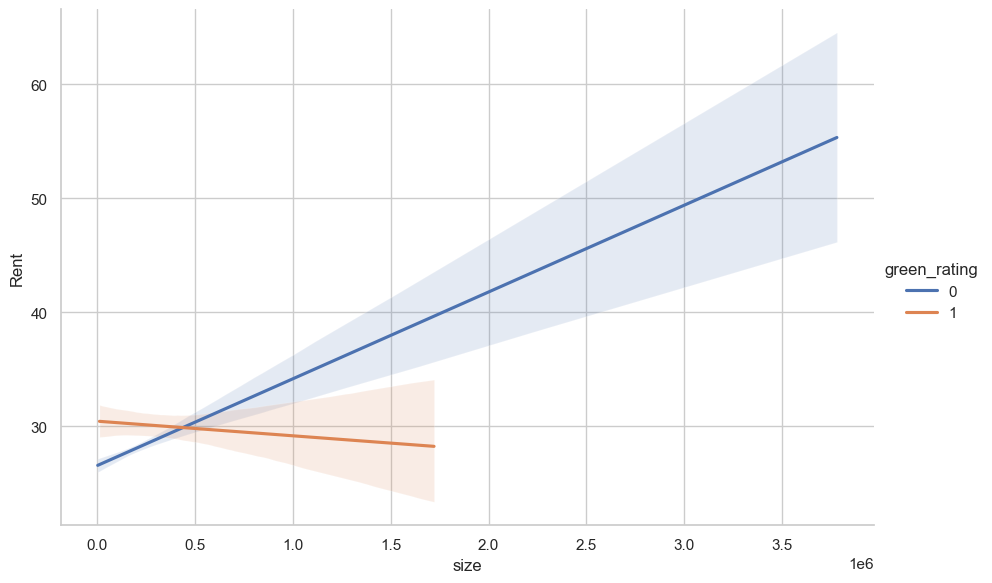

In [27]:
sns.set(style='whitegrid')
g=sns.lmplot(data=green_buildings,x='size',y='Rent',hue='green_rating',scatter=False,height=6,aspect=1.5)

From the graph above, it seems that size is positively correlated with rent for non-green buildings. However, for green buildings, it seems that the correlation is undetermined (perhaps due to fewer data points available for excessively large green buildings). 


Our analysis so far seems to show that the rent prices of green buildings behave similarly to non-green buildings when featuring variables such as cluster rent and electricty prices. However, we can't statistically determine if variables like age or size of a green building could make its rent behave differently from non-green buildings.

From this analysis, it seems that it is reasonable for the developer to assume green buildings will continue generating profits for 30 years after the initial costs have been recouped since green buildings tend to follow a similar rent pattern in relation to its counterpart. 

# Title

## Heading

### Sub heading

In [49]:
plt.hist(green_buildings['age'], green_buildings['Rent'], bins = 20)

TypeError: hist() got multiple values for argument 'bins'